In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.constants import c
from scipy.fftpack import rfft
c = c.value*1e-6 #Speed of light in mm/ns
import peakdetect
# import scipy.optimize as op
# from scipy.interpolate import interp1d
# from scipy.optimize import curve_fit

In [2]:
T = 0.9763
R = 0.0234
A = 0.0003
L = 2.25*25.4
nu_fsr = c/(2*L)
print nu_fsr

2.62285615048


In [3]:
nu = np.r_[140:160:5000j] # Range of frequencies of interest
F = 4*R/(1-R)**2
delta = 2*np.pi*nu/nu_fsr
P = (T/(1-R))**2*1./(1 + F*np.sin(delta/2)**2)

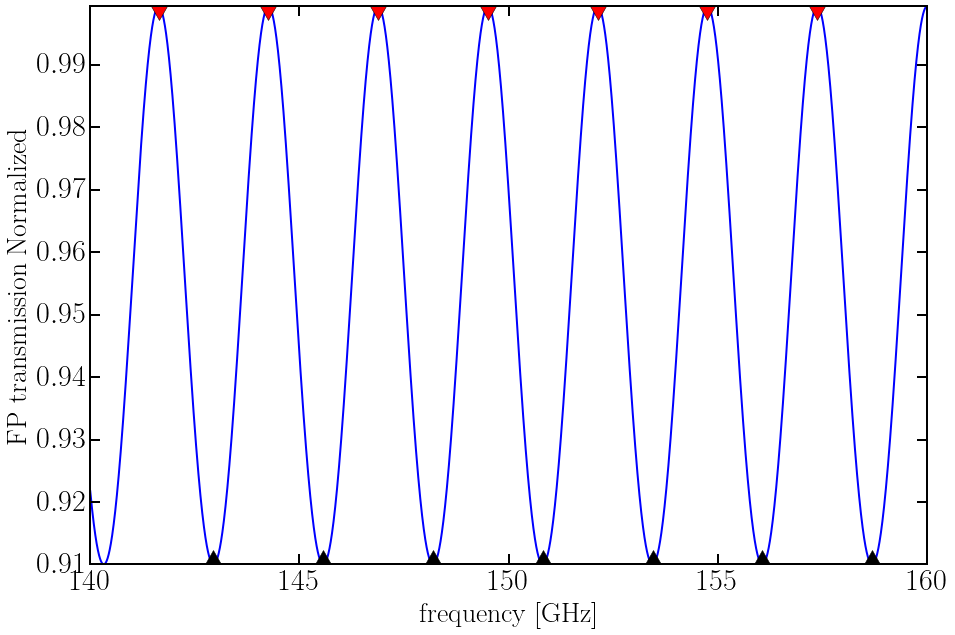

In [4]:
max_peaks, min_peaks = peakdetect.peakdetect(P,nu, lookahead=200)
max_nu,max_P = map(list, zip(*max_peaks))
min_nu, min_P = map(list, zip(*min_peaks))

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(nu, P, 'b')
ax.plot(max_nu, max_P, 'rd', markersize=20)
ax.plot(min_nu, min_P, 'kd', markersize=20)
ax.axis('tight')
ax.set_xlabel('frequency [GHz]')
ax.set_ylabel('FP transmission Normalized');

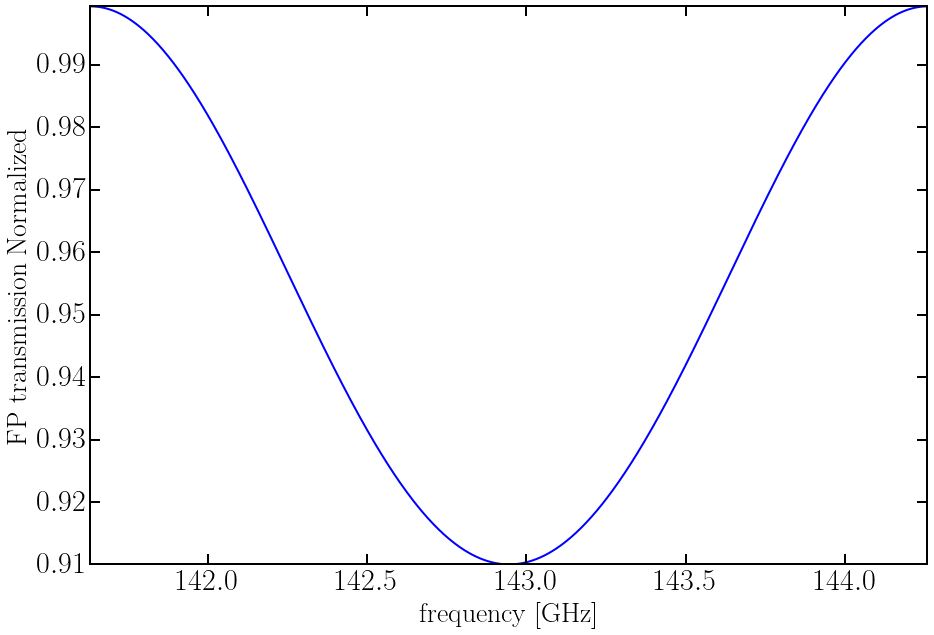

In [5]:
# Use the max peaks to determine the range used in the fourier fitting
mask = np.logical_and(nu >= nu[np.where(nu == max_nu[0])[0]], nu <= nu[np.where(nu == max_nu[1])[0]])

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(nu[mask], P[mask], 'b')
ax.axis('tight')
ax.set_xlabel('frequency [GHz]')
ax.set_ylabel('FP transmission Normalized');

In [6]:
index = np.arange(1, len(P[mask])-1)
y = rfft(P[mask])/len(P[mask])
b0 = y[0]
y*=2
c_k = y[1:-1].real
s_k = y[1:-1].imag
b_k = (c_k**2 + s_k**2)**0.5
nu_0k = np.arctan2(s_k, c_k)/2/np.pi

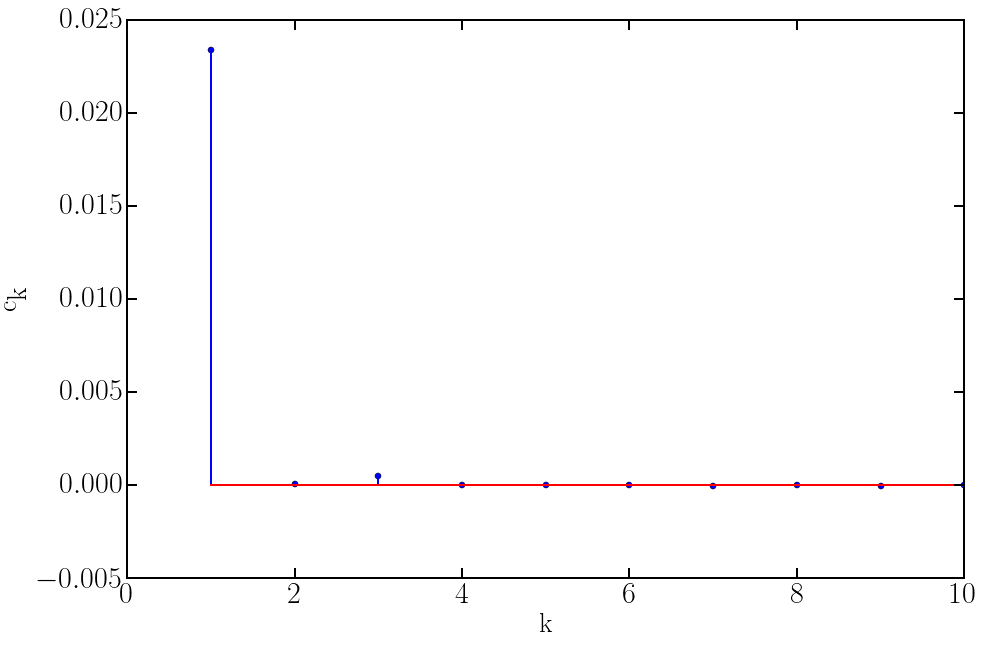

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
ax.stem(index, c_k/(2*b0))
ax.set_xlim(0.0, 10.0)
# ax.axis('tight')
ax.set_xlabel('k')
ax.set_ylabel(r'$\textrm{c}_{\textrm{k}}$');

In [12]:
fourier_term = lambda bk, k: bk*np.cos(2*np.pi*nu/nu_fsr*k)
P_fseries = b0 + np.sum(map(fourier_term, b_k, index),axis=0)

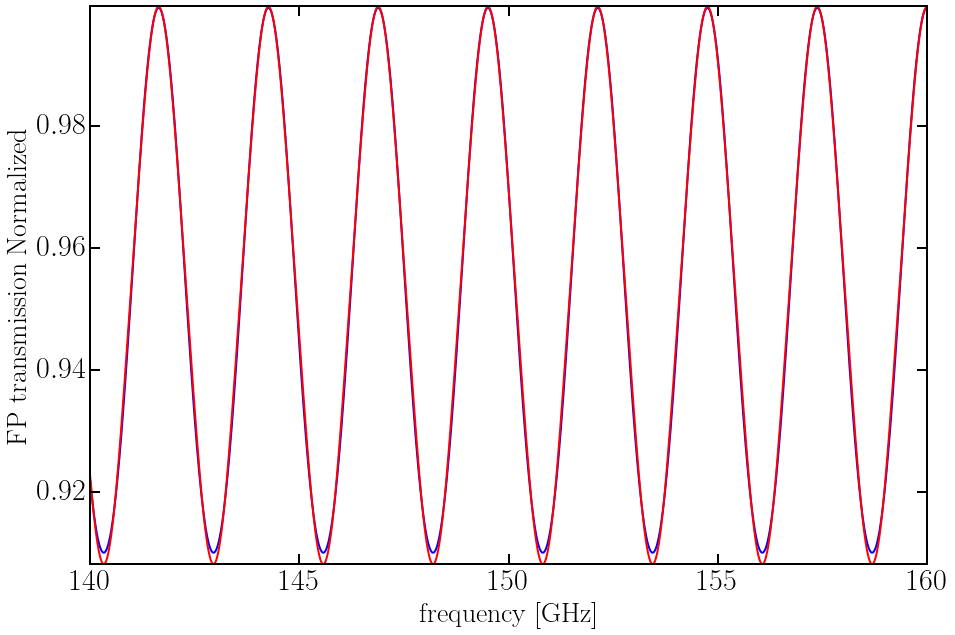

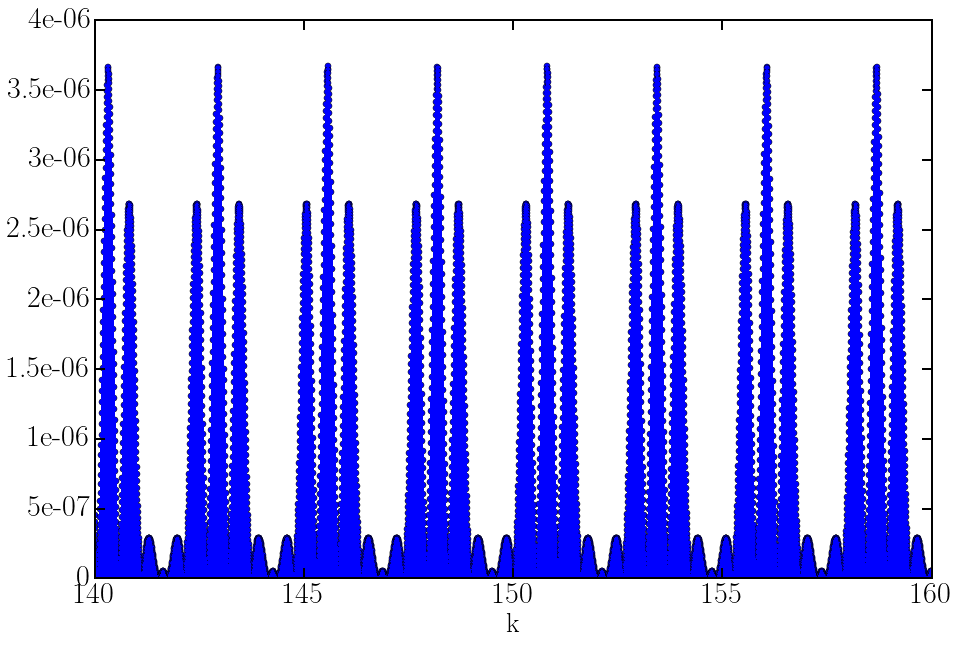

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(nu, P, 'b')
ax.plot(nu, P_fseries, 'r')
ax.axis('tight')
ax.set_xlabel('frequency [GHz]')
ax.set_ylabel('FP transmission Normalized');
fig, ax = plt.subplots(figsize=(15,10))
ax.stem(nu, (P - P_fseries)**2)  # Fourier Coefficients 
# ax.axis('tight')
ax.set_xlabel('k')
ax.set_yticklabels(['%1.2g' %t for t in ax.get_yticks()]);

In [15]:
#Let's try and get the FP fringes using the series expansion
A = (T/(1-R))**2*((1-R)/(1 + R))
R_k = R**index
P_series = A*(1 + 2*np.sum(map(fourier_term, R_k, index),axis=0))

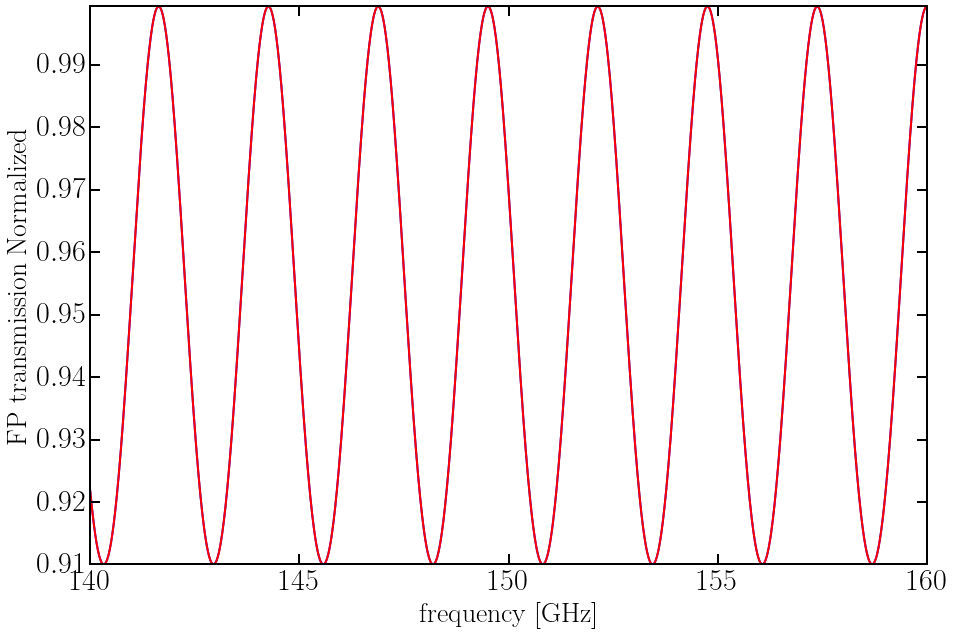

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(nu, P, 'b')
ax.plot(nu, P_series, 'r')
ax.axis('tight')
ax.set_xlabel('frequency [GHz]')
ax.set_ylabel('FP transmission Normalized');

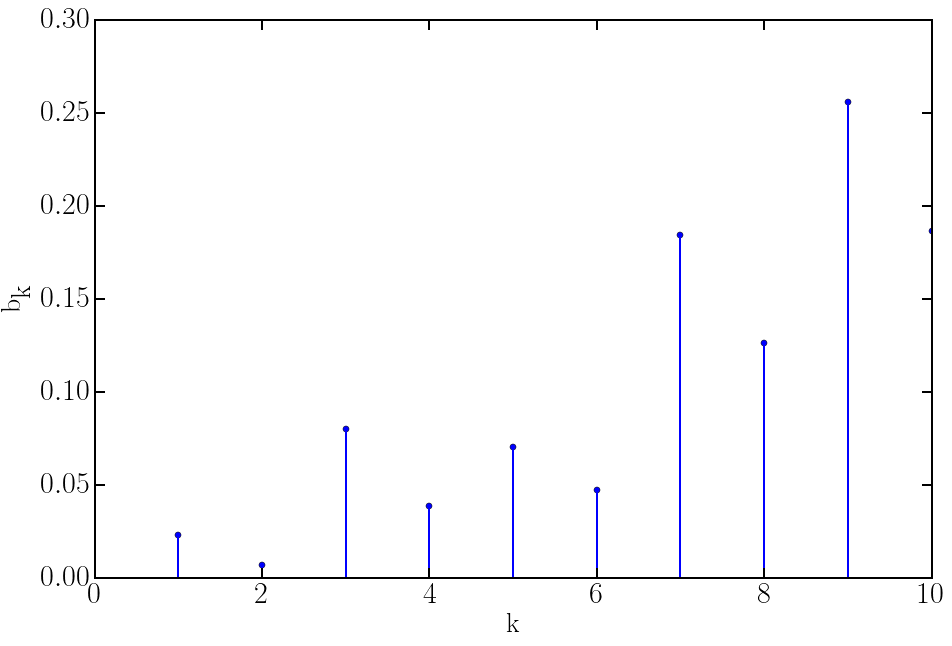

In [17]:
# Let's see if the fourier coefficients reproduce R
R_try = (b_k/(2*b0))**(1./index)
fig, ax = plt.subplots(figsize=(15,10))
ax.stem(index[:10], R_try[:10])
ax.set_xlim(0.0, 10.0)
# ax.axis('tight')
ax.set_xlabel('k')
ax.set_ylabel(r'$\textrm{b}_{\textrm{k}}$');

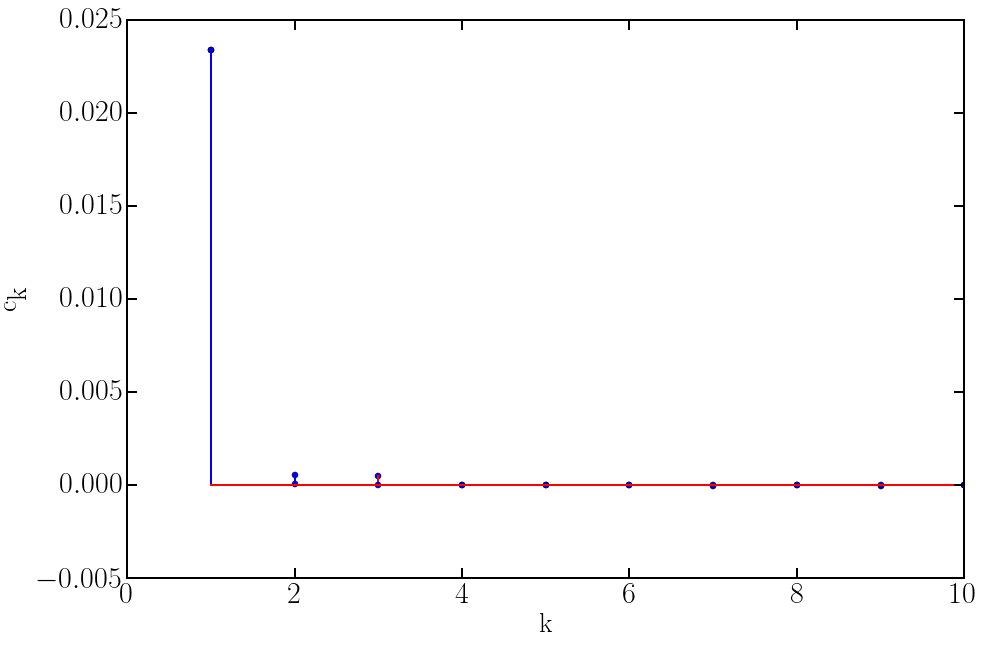

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
ax.stem(index, c_k/(2*b0), 'r')  # Fourier Coefficients 
ax.stem(index, R_k, 'b')
ax.set_xlim(0.0, 10.0)
# ax.axis('tight')
ax.set_xlabel('k')
ax.set_ylabel(r'$\textrm{c}_{\textrm{k}}$');

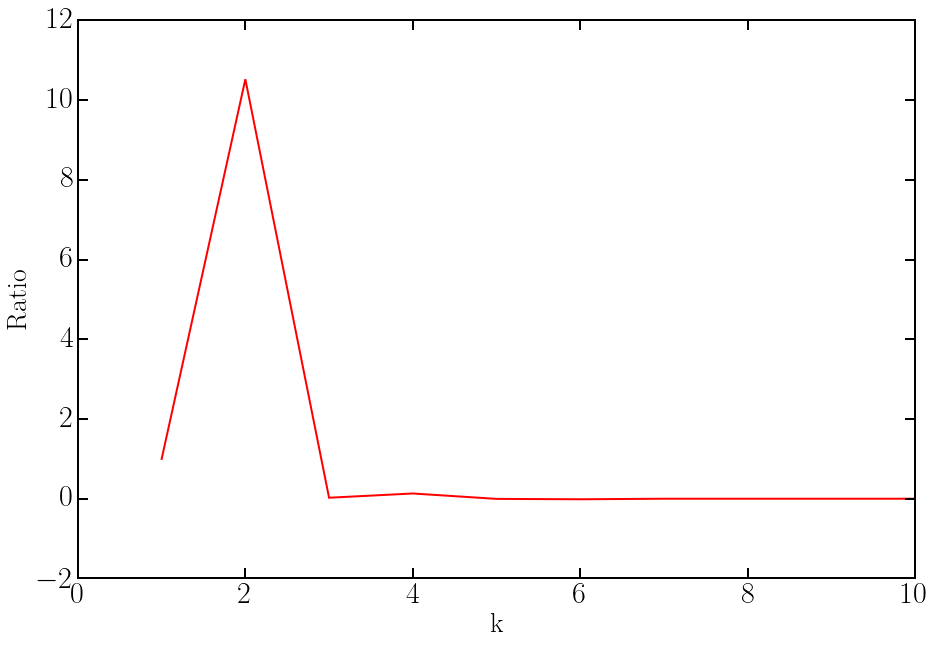

In [26]:
ratio = R_k/(c_k/(2*b0))
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(index, ratio, 'r')  
ax.set_xlim(0.0, 10.0)
# ax.axis('tight')
ax.set_xlabel('k')
ax.set_ylabel(r'Ratio');

In [ ]:
''